# Working with time series data

Some imports:

In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

pd.options.display.max_rows = 8

## Dates and times in pandas

The standard library of Python contains the `datetime` module to handle with date and time data:

In [2]:
import datetime

In [3]:
dt = datetime.datetime(year=2016, month=12, day=19, hour=13, minute=30)
dt

datetime.datetime(2016, 12, 19, 13, 30)

In [4]:
print(dt)

2016-12-19 13:30:00


### The ``Timestamp`` object

Pandas has its own date and time objects, which are compatible with the standard `datetime` objects, but give some more convenience to work with.  
The `Timestamp` object can also be constructed from a string:

In [5]:
ts = pd.Timestamp('2016-12-19')
ts

Timestamp('2016-12-19 00:00:00')

Like with `datetime.datetime` objects, there are several useful attributes available on the `Timestamp`. For example, we can get the month:

In [6]:
ts.month

12

### Parsing datetime strings 

![](http://imgs.xkcd.com/comics/iso_8601.png)


Unfortunately, when working with real world data, you encounter many different datetime formats. Most of the time when you have to deal with them, they come in text format, eg from a CSV file. To work with those data in pandas, we first have to *parse* the strings to actual timestamp objects. Enter the `to_datetime` function.

In [7]:
pd.to_datetime("2016-12-09")

Timestamp('2016-12-09 00:00:00')

In [8]:
pd.to_datetime("09/12/2016")

Timestamp('2016-09-12 00:00:00')

In [9]:
pd.to_datetime("09/12/2016", dayfirst=True)

Timestamp('2016-12-09 00:00:00')

In [10]:
pd.to_datetime("09/12/2016", format="%d/%m/%Y")

Timestamp('2016-12-09 00:00:00')

A detailed overview of how to specify the `format` string, see the table in the python documentation: https://docs.python.org/3.5/library/datetime.html#strftime-and-strptime-behavior

### Timestamp data in a Series

In [11]:
s = pd.Series(['2016-12-09 10:00:00', '2016-12-09, 11:00:00', '2016-12-09 12:00:00'])

The `to_datetime` function can also be used to convert a full series of strings:

In [12]:
ts = pd.to_datetime(s)

In [13]:
ts

0   2016-12-09 10:00:00
1   2016-12-09 11:00:00
2   2016-12-09 12:00:00
dtype: datetime64[ns]

Notice the data type of this series: the `datetime64[ns]` dtype. This indicates that we have a series of actual datetime values.

The same attributes as on single `Timestamp`s are also available on a Series with datetime data, using the `.dt` accessor:

In [14]:
ts.dt.hour

0    10
1    11
2    12
dtype: int64

In [15]:
ts.dt.weekday

0    4
1    4
2    4
dtype: int64

To quickly construct some regular time series data, the [``pd.date_range``](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.date_range.html) function comes in handy:

In [16]:
pd.Series(pd.date_range(start="2016-01-01", periods=10, freq='3H'))

0   2016-01-01 00:00:00
1   2016-01-01 03:00:00
2   2016-01-01 06:00:00
3   2016-01-01 09:00:00
            ...        
6   2016-01-01 18:00:00
7   2016-01-01 21:00:00
8   2016-01-02 00:00:00
9   2016-01-02 03:00:00
dtype: datetime64[ns]

## Time series data: timestamps in the index

For the following demonstration of the time series functionality, we create some pseudo-random data:

In [17]:
data = pd.DataFrame({'datetime': pd.date_range("2014-01-01", periods=20000, freq='H'),
                     'col1': np.cos(np.arange(20000)/200) + np.random.randn(20000)*3,
                     'col2': np.sin(np.arange(20000)/500) + np.random.randn(20000)*2})
data = data.set_index('datetime')

With `set_index('datetime')`, we set the column with datetime values as the index.

### The DatetimeIndex

When we ensure the DataFrame has a `DatetimeIndex`, time-series related functionality becomes available:

In [18]:
data.index

DatetimeIndex(['2014-01-01 00:00:00', '2014-01-01 01:00:00',
               '2014-01-01 02:00:00', '2014-01-01 03:00:00',
               '2014-01-01 04:00:00', '2014-01-01 05:00:00',
               '2014-01-01 06:00:00', '2014-01-01 07:00:00',
               '2014-01-01 08:00:00', '2014-01-01 09:00:00',
               ...
               '2016-04-12 22:00:00', '2016-04-12 23:00:00',
               '2016-04-13 00:00:00', '2016-04-13 01:00:00',
               '2016-04-13 02:00:00', '2016-04-13 03:00:00',
               '2016-04-13 04:00:00', '2016-04-13 05:00:00',
               '2016-04-13 06:00:00', '2016-04-13 07:00:00'],
              dtype='datetime64[ns]', name='datetime', length=20000, freq=None)

Similar to a Series with datetime data, there are some attributes of the timestamp values available:

In [19]:
data.index.day

array([ 1,  1,  1, ..., 13, 13, 13], dtype=int32)

In [20]:
data.index.dayofyear

array([  1,   1,   1, ..., 104, 104, 104], dtype=int32)

In [21]:
data.index.year

array([2014, 2014, 2014, ..., 2016, 2016, 2016], dtype=int32)

The `plot` method will also adapt it's labels (when you zoom in, you can see the different levels of detail of the datetime labels):


<IPython.core.display.Javascript object>


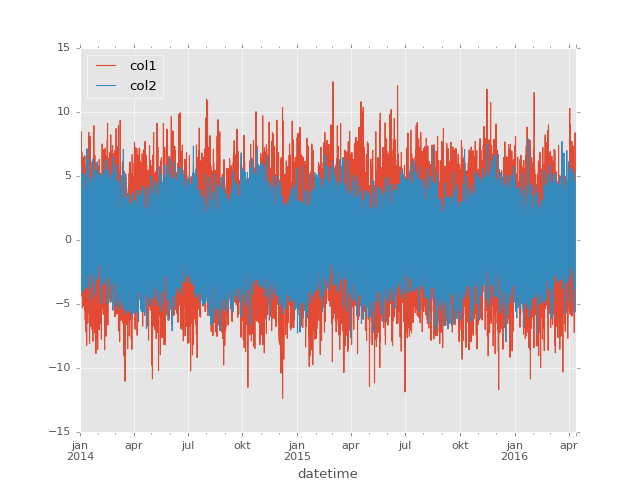

In [22]:
data.plot()

We have to much data to sensibly plot on one figure. Let's see how we can easily select part of the data or aggregate the data to other time resolutions in the next sections.

### Selecting data from a time series

We can use label based indexing on a timeseries as expected:

In [23]:
data[pd.Timestamp("2016-01-01 09:00"):pd.Timestamp("2016-01-01 12:00")]

,col1,col2
datetime,,
2016-01-01 09:00:00,3.328010,0.946195
2016-01-01 10:00:00,2.115735,-0.401412
2016-01-01 11:00:00,-2.310662,-3.498276
2016-01-01 12:00:00,1.692571,-0.604472


But, for convenience, indexing a time series also works with strings:

In [24]:
data["2016-01-01 09:00":"2016-01-01 12:00"]

,col1,col2
datetime,,
2016-01-01 09:00:00,3.328010,0.946195
2016-01-01 10:00:00,2.115735,-0.401412
2016-01-01 11:00:00,-2.310662,-3.498276
2016-01-01 12:00:00,1.692571,-0.604472


A nice feature is **"partial string" indexing**, where we can do implicit slicing by providing a partial datetime string.

E.g. all data of 2015:

In [25]:
data['2015']

,col1,col2
datetime,,
2015-01-01 00:00:00,3.929307,-1.317268
2015-01-01 01:00:00,-1.804871,-0.677568
2015-01-01 02:00:00,2.173731,-1.569884
2015-01-01 03:00:00,-0.328644,-0.444760
...,...,...
2015-12-31 20:00:00,6.366428,-1.120229
2015-12-31 21:00:00,-1.108797,-2.198679
2015-12-31 22:00:00,3.892939,-3.346461
2015-12-31 23:00:00,2.467504,2.214466


Normally you would expect this to access a column named '2015', but as for a DatetimeIndex, pandas also tries to interprete it as a datetime slice.

Or all data of January up to March 2016:

In [26]:
data['2016-01':'2016-03']

,col1,col2
datetime,,
2016-01-01 00:00:00,0.376405,-3.666415
2016-01-01 01:00:00,-0.110360,-0.348847
2016-01-01 02:00:00,-0.195069,2.238899
2016-01-01 03:00:00,-1.512327,-2.787297
...,...,...
2016-03-31 20:00:00,-0.639810,5.033372
2016-03-31 21:00:00,-0.644238,6.111184
2016-03-31 22:00:00,-3.918589,1.390754
2016-03-31 23:00:00,-4.043085,-0.199230


<div class="alert alert-success">
    <b>EXERCISE</b>: select all data starting from 2015
</div>

In [27]:
data['2015':]

,col1,col2
datetime,,
2015-01-01 00:00:00,3.929307,-1.317268
2015-01-01 01:00:00,-1.804871,-0.677568
2015-01-01 02:00:00,2.173731,-1.569884
2015-01-01 03:00:00,-0.328644,-0.444760
...,...,...
2016-04-13 04:00:00,-3.128785,0.300384
2016-04-13 05:00:00,1.091045,1.938275
2016-04-13 06:00:00,0.784228,5.138271
2016-04-13 07:00:00,3.811526,1.140023


<div class="alert alert-success">
    <b>EXERCISE</b>: select all data in January for all different years
</div>

In [28]:
data[data.index.month == 1]

,col1,col2
datetime,,
2014-01-01 00:00:00,6.987520,1.755256
2014-01-01 01:00:00,2.317003,1.437094
2014-01-01 02:00:00,2.319248,1.033819
2014-01-01 03:00:00,-2.812165,0.717213
...,...,...
2016-01-31 20:00:00,1.987161,1.944909
2016-01-31 21:00:00,-4.504628,-1.230040
2016-01-31 22:00:00,-5.336038,-2.225340
2016-01-31 23:00:00,-1.022769,-3.849721


<div class="alert alert-success">
    <b>EXERCISE</b>: select all data in January, February and March for all different years
</div>

In [29]:
data['months'] = data.index.month
data[data['months'].isin([1, 2, 3])]

,col1,col2,months
datetime,,,
2014-01-01 00:00:00,6.987520,1.755256,1
2014-01-01 01:00:00,2.317003,1.437094,1
2014-01-01 02:00:00,2.319248,1.033819,1
2014-01-01 03:00:00,-2.812165,0.717213,1
...,...,...,...
2016-03-31 20:00:00,-0.639810,5.033372,3
2016-03-31 21:00:00,-0.644238,6.111184,3
2016-03-31 22:00:00,-3.918589,1.390754,3
2016-03-31 23:00:00,-4.043085,-0.199230,3


<div class="alert alert-success">
    <b>EXERCISE</b>: select all 'daytime' data (between 8h and 20h) for all days
</div>

In [30]:
data[(data.index.hour >= 8) & (data.index.hour < 20)]

,col1,col2,months
datetime,,,
2014-01-01 08:00:00,-0.643424,6.164012,1
2014-01-01 09:00:00,-5.794838,2.873218,1
2014-01-01 10:00:00,7.082397,-1.171474,1
2014-01-01 11:00:00,5.339586,1.118429,1
...,...,...,...
2016-04-12 16:00:00,-0.076163,-0.269563,4
2016-04-12 17:00:00,-1.202519,1.149482,4
2016-04-12 18:00:00,-2.677639,0.763788,4
2016-04-12 19:00:00,8.373951,1.715783,4


In [31]:
data.between_time('08:00', '20:00')

,col1,col2,months
datetime,,,
2014-01-01 08:00:00,-0.643424,6.164012,1
2014-01-01 09:00:00,-5.794838,2.873218,1
2014-01-01 10:00:00,7.082397,-1.171474,1
2014-01-01 11:00:00,5.339586,1.118429,1
...,...,...,...
2016-04-12 17:00:00,-1.202519,1.149482,4
2016-04-12 18:00:00,-2.677639,0.763788,4
2016-04-12 19:00:00,8.373951,1.715783,4
2016-04-12 20:00:00,6.825421,1.100839,4


In [32]:
data = pd.DataFrame({'datetime': pd.date_range("2014-01-01", periods=20000, freq='H'),
                     'col1': np.cos(np.arange(20000)/200) + np.random.randn(20000)*3,
                     'col2': np.sin(np.arange(20000)/500) + np.random.randn(20000)*2})
data = data.set_index('datetime')

### The power of pandas: `resample`

A very powerfull method is **`resample`: converting the frequency of the time series** (e.g. from hourly to daily data).

The time series has a frequency of 1 hour. I want to change this to daily:

In [33]:
data.resample('D').mean().head()

,col1,col2
datetime,,
2014-01-01,0.664645,-0.437365
2014-01-02,-0.037908,0.819028
2014-01-03,0.593259,-0.408797
2014-01-04,0.069547,0.444013
2014-01-05,0.673730,0.173004


<div class="alert alert-danger">
    <b>NOTE</b>: with older versions of pandas, <code>data.resample('D').mean()</code> was expressed as <code>data.resample('D', how='mean')</code>.
</div>

Similar to `groupby`, other methods can also be specified:

In [34]:
data.resample('D').max().head()

,col1,col2
datetime,,
2014-01-01,6.935985,2.939839
2014-01-02,3.568944,4.056588
2014-01-03,7.157036,3.135645
2014-01-04,7.398489,4.463901
2014-01-05,5.634831,5.682550


The string to specify the new time frequency: http://pandas.pydata.org/pandas-docs/dev/timeseries.html#offset-aliases  
These strings can also be combined with numbers, eg `'10D'`.

<IPython.core.display.Javascript object>


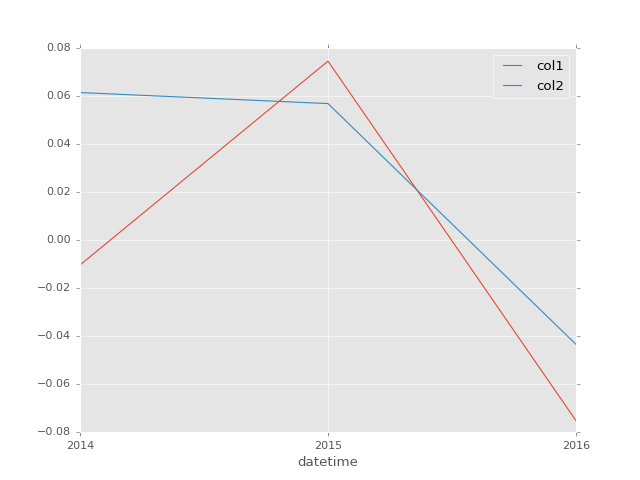

In [35]:
data.resample('A').mean().plot()

<div class="alert alert-success">
    <b>EXERCISE</b>: plot the monthly standard deviation of the columns
</div>

<IPython.core.display.Javascript object>


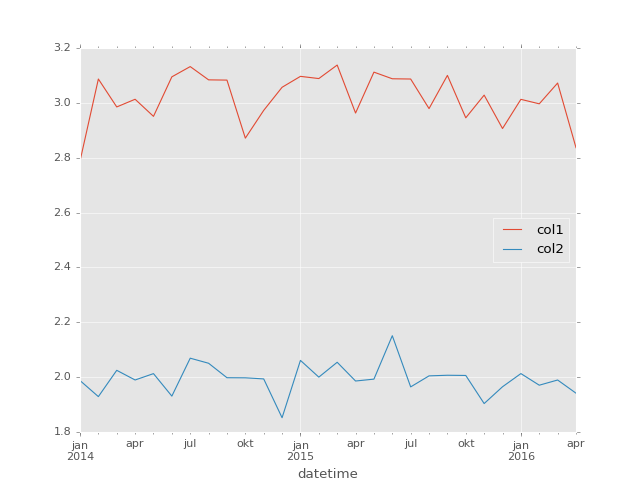

In [36]:
data.resample('M').std().plot() # 'A'

<div class="alert alert-success">
    <b>EXERCISE</b>: plot the monthly mean and median values for the years 2015-2016 for 'col1'
</div>

<IPython.core.display.Javascript object>


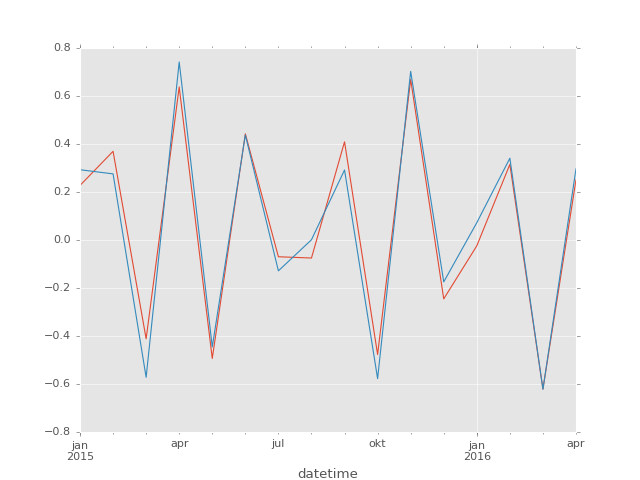

In [37]:
plt.figure()
data.loc['2015':, 'col1'].resample('M').mean().plot()
data.loc['2015':, 'col1'].resample('M').median().plot()

<IPython.core.display.Javascript object>


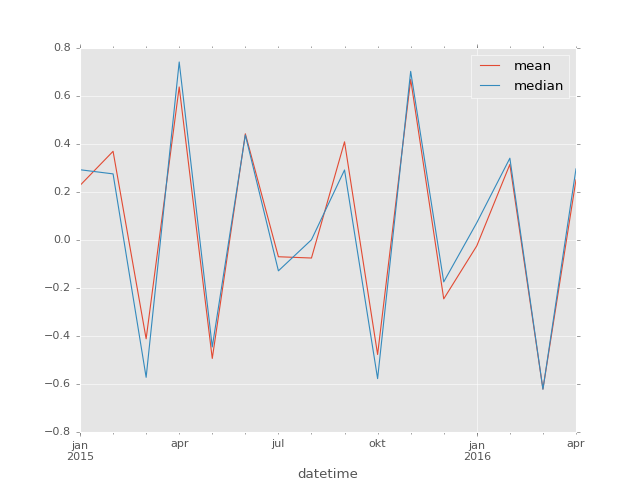

In [38]:
data.loc['2015':, 'col1'].resample('M').agg(['mean', 'median']).plot()

<div class="alert alert-success">
    <b>QUESTION</b>: plot the monthly mininum and maximum daily average value of the 'col2' column
</div>

In [39]:
daily = data['col2'].resample('D').mean()

<IPython.core.display.Javascript object>


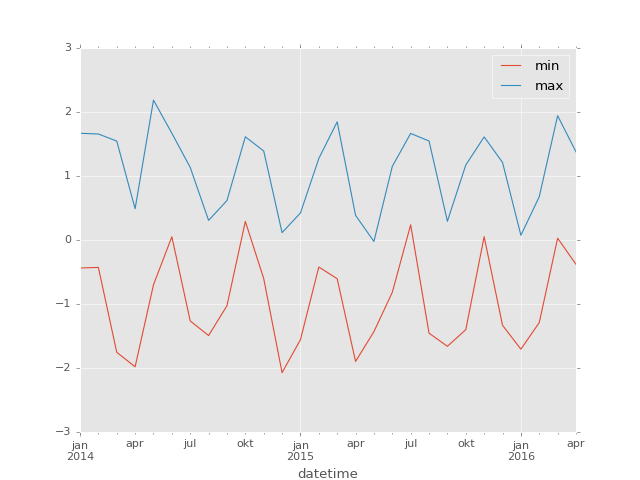

In [40]:
daily.resample('M').agg(['min', 'max']).plot()

<div class="alert alert-success">
    <b>QUESTION</b>: make a bar plot of the mean of the stations in year of 2014
</div>

<IPython.core.display.Javascript object>


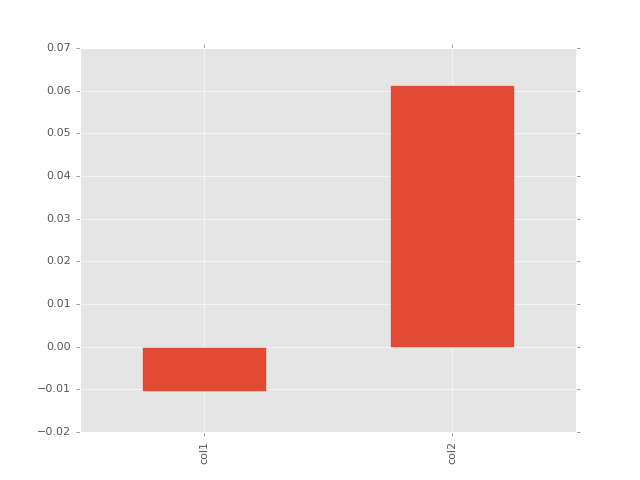

In [41]:
plt.figure()
data['2014'].mean().plot(kind='bar')